### Based on: https://github.com/RoccoDAnt/MyFavoriteBIAtool_NEUBIAS_member

In [1]:
%gui qt
from skimage import io
import napari

import numpy as np
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import gaussian
from napari.utils import nbscreenshot
from skimage import morphology

In [2]:
myImage=io.imread('datasets/myImage.tif')
viewer = napari.view_image(myImage)

In [3]:
gf_image=gaussian(myImage, sigma=1)
binary=gf_image>0.2
opening = morphology.binary_opening(binary)
distance = ndi.distance_transform_edt(opening)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=binary)
viewer.add_image(labels, rgb=False, name='Labelled objects', opacity=0.3, colormap='inferno')

<Image layer 'Labelled objects' at 0x12c6074f0>

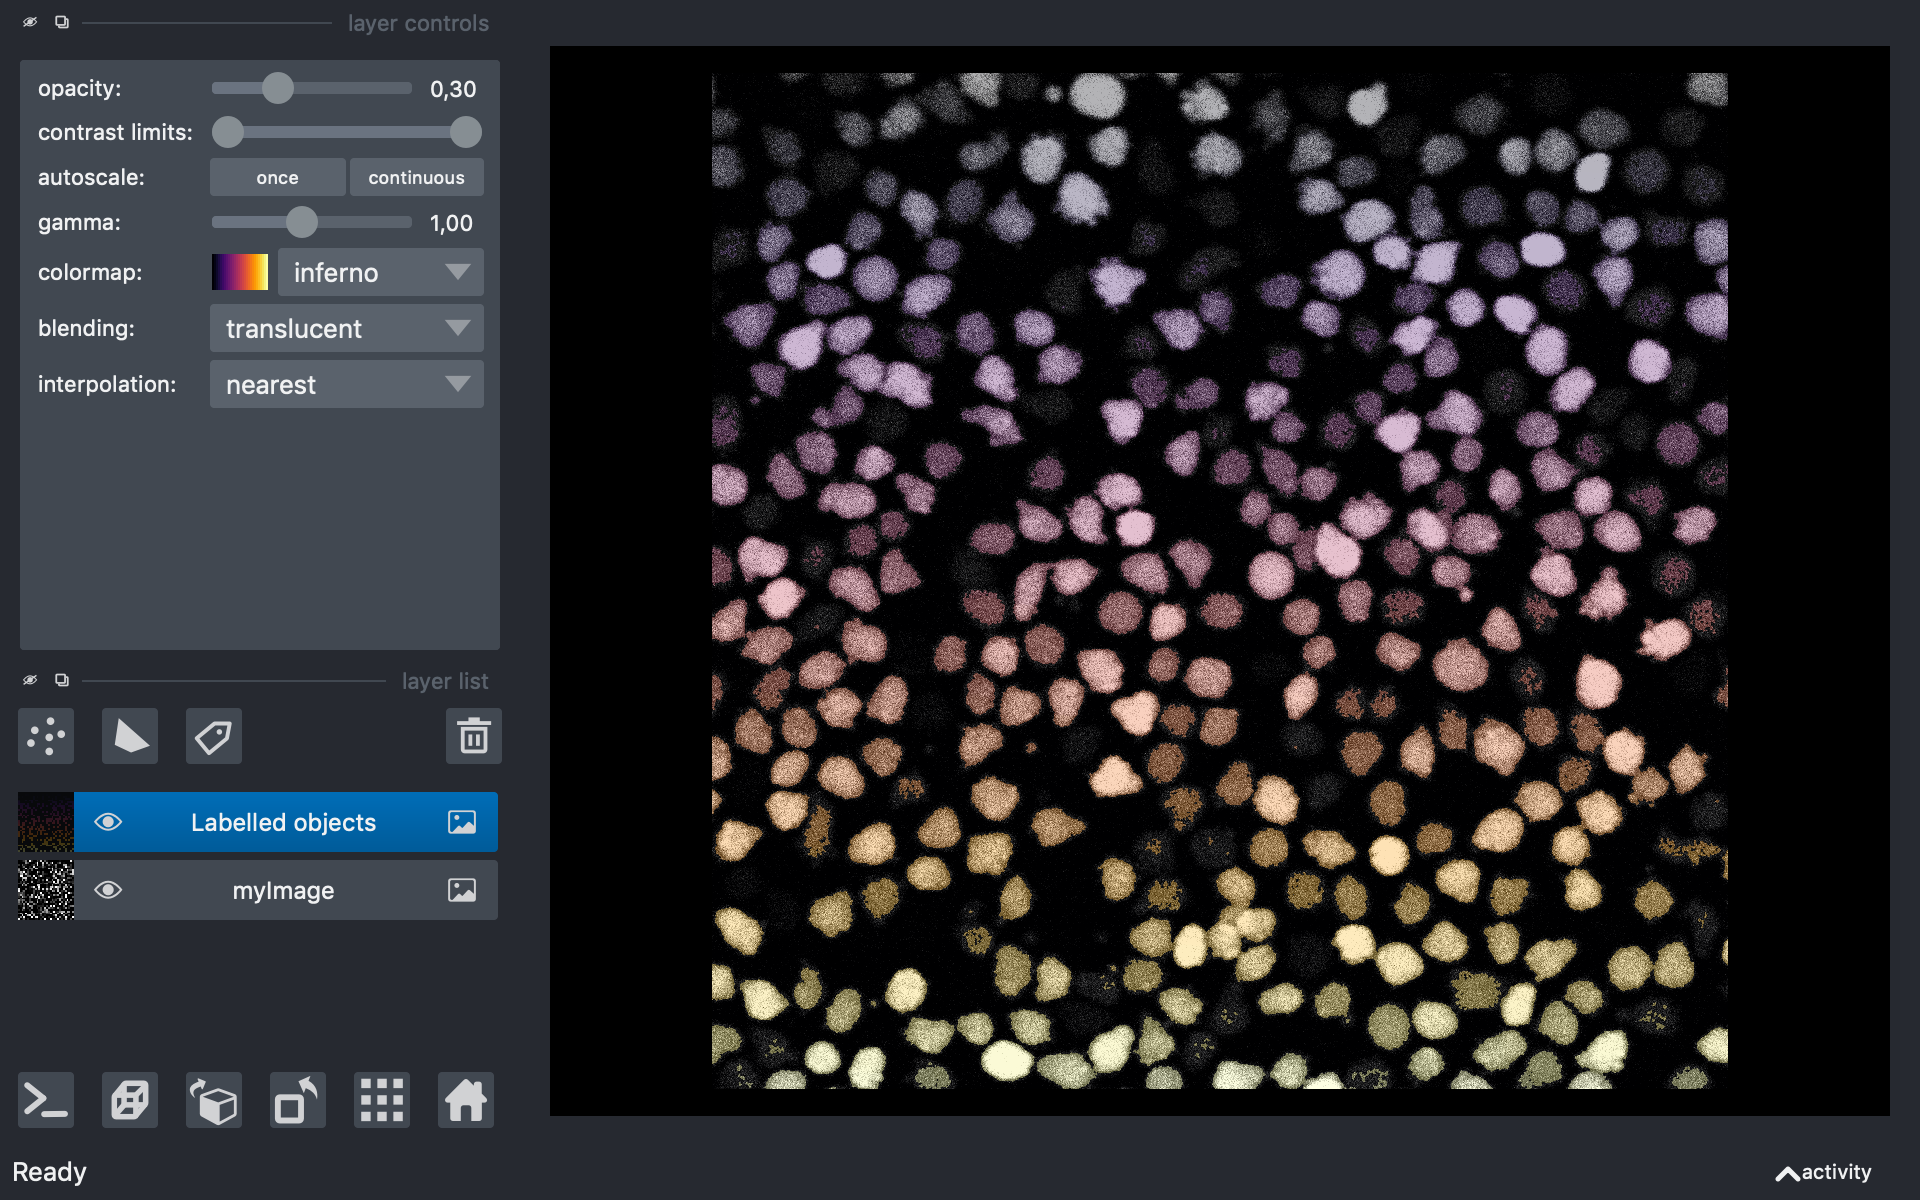

In [4]:
nbscreenshot(viewer)

In [5]:
# let's see what the layers list has in it right now
print(viewer.layers)

[<Image layer 'myImage' at 0x12c55be50>, <Image layer 'Labelled objects' at 0x12c6074f0>]


In [6]:
cells_layer = viewer.layers['myImage']
cells_layer

<Image layer 'myImage' at 0x12c55be50>

In [7]:
# Now let's change the colormap
cells_layer.colormap = 'cyan'

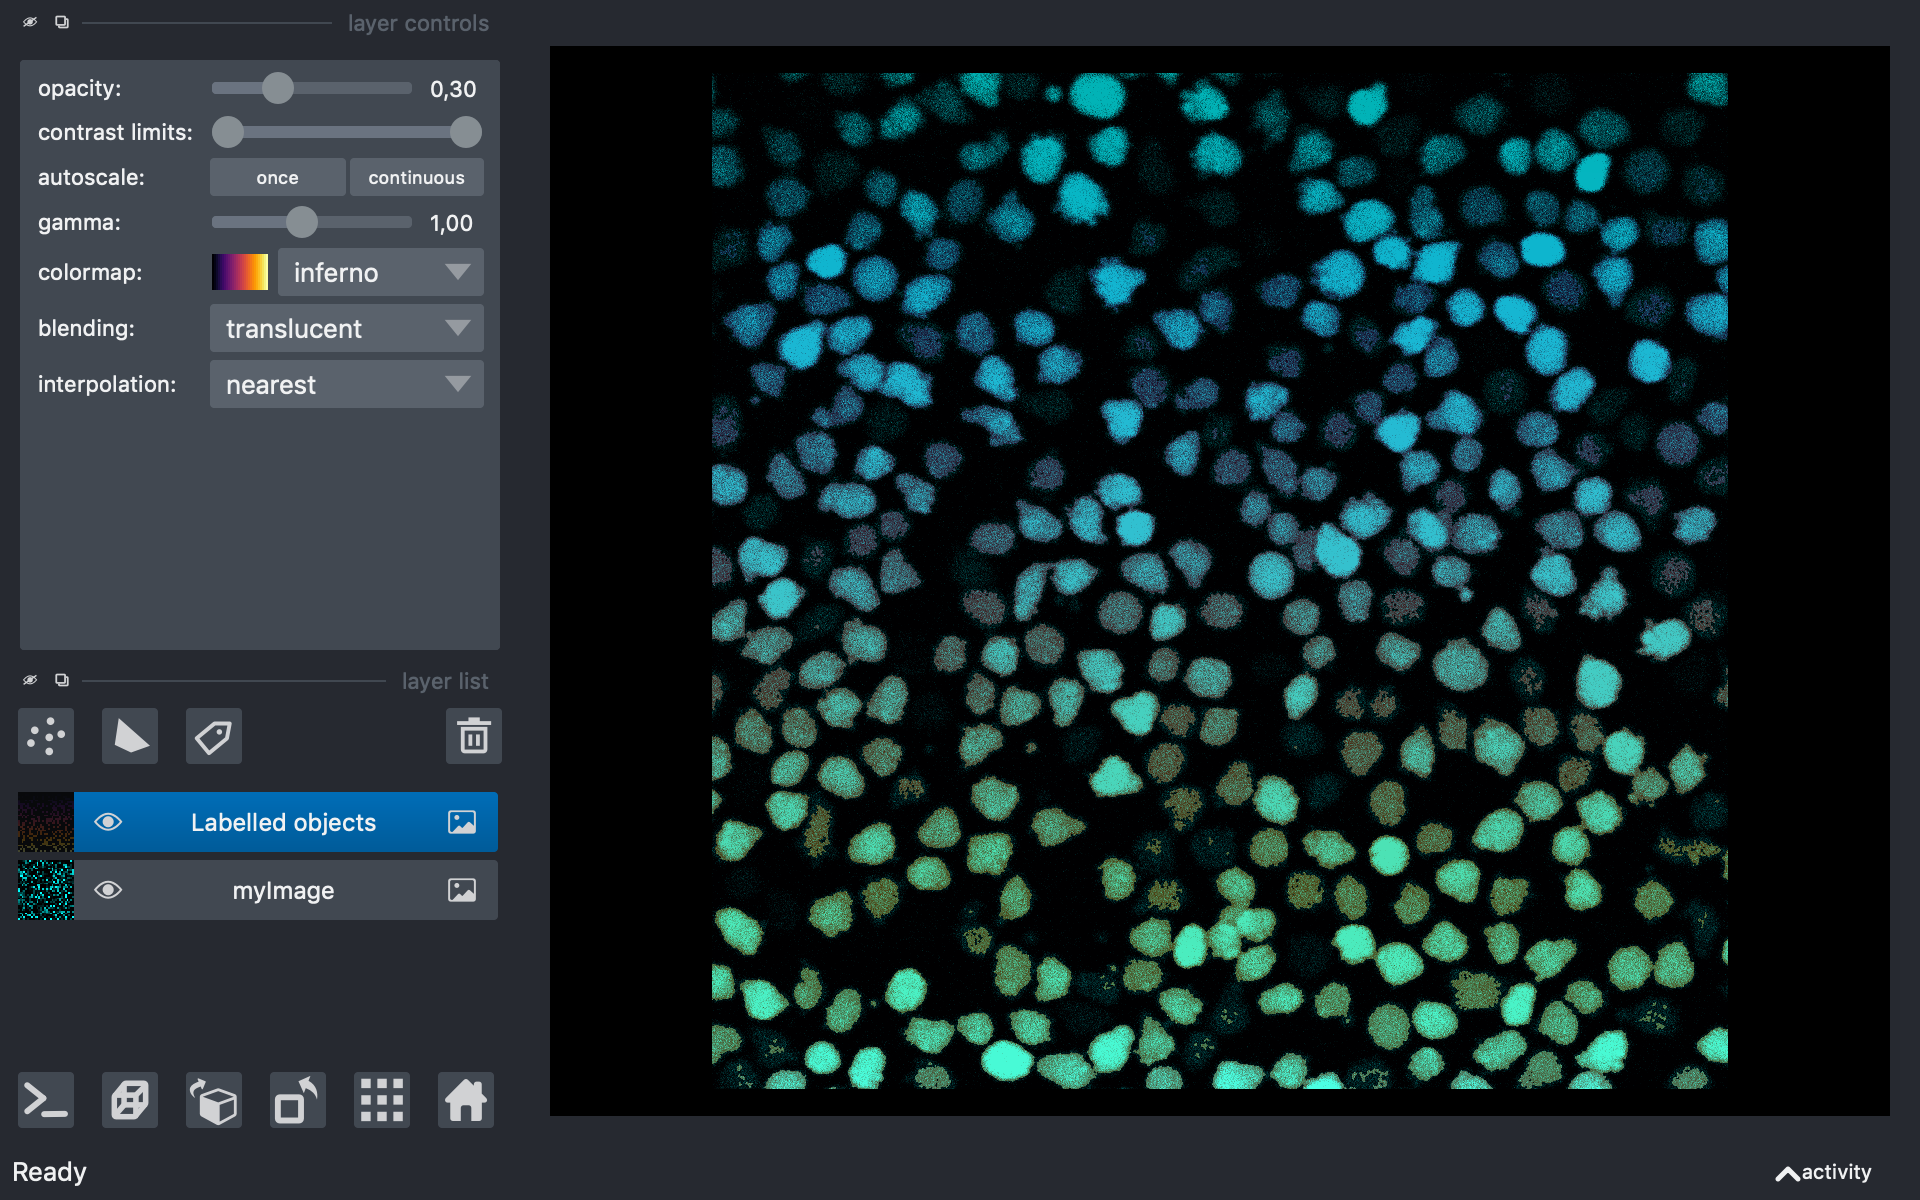

In [8]:
nbscreenshot(viewer)